In [1]:
!pip install openpyxl


Import necessary bibs and load data


In [2]:
import pandas as pd

# Charger le fichier Excel
file_path = '/content/Olympics dataset.xlsx'  # Remplacer par le chemin réel du fichier
data = pd.read_excel(file_path)  # Supposons que vous chargez la première feuille

# Afficher le début du DataFrame
print(data.head())

   Rank        Country Country Code  Gold  Silver  Bronze  Total
0     1  United States           US    40      44      42    126
1     2          China          CHN    40      27      24     91
2     3          Japan          JPN    20      12      13     45
3     4      Australia          AUS    18      19      16     53
4     5         France          FRA    16      26      22     64


1/Data Understanding


In [3]:
# Load data from each sheet
paris2024_df = pd.read_excel(file_path, sheet_name='Paris2024')
tokyo2020_df = pd.read_excel(file_path, sheet_name='Tokyo2020')
rio2016_df = pd.read_excel(file_path, sheet_name='Rio2016')

# Display first few rows of each sheet
print("Paris 2024 Data:")
print(paris2024_df.head())

print("Tokyo 2020 Data:")
print(tokyo2020_df.head())

print("Rio 2016 Data:")
print(rio2016_df.head())

Paris 2024 Data:
   Rank        Country Country Code  Gold  Silver  Bronze  Total
0     1  United States           US    40      44      42    126
1     2          China          CHN    40      27      24     91
2     3          Japan          JPN    20      12      13     45
3     4      Australia          AUS    18      19      16     53
4     5         France          FRA    16      26      22     64
Tokyo 2020 Data:
      Country Gold Silver Bronze  Total
0   Argentina    -      1      2      3
1     Armenia    -      2      2      4
2   Australia   17      7     22     46
3     Austria    1      1      5      7
4  Azerbaijan    -      3      4      7
Rio 2016 Data:
     Country Gold Silver Bronze  Total
0    Algeria    -      2      -      2
1  Argentina    3      1      -      4
2    Armenia    1      3      -      4
3  Australia    8     11     10     29
4    Austria    -      -      1      1


1.1/Paris 2024 Olympics Dataset Understanding


In [4]:
paris2024_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          91 non-null     int64 
 1   Country       91 non-null     object
 2   Country Code  91 non-null     object
 3   Gold          91 non-null     int64 
 4   Silver        91 non-null     int64 
 5   Bronze        91 non-null     int64 
 6   Total         91 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 5.1+ KB


In [5]:
paris2024_df.describe()

,Rank,Gold,Silver,Bronze,Total
count,91.000000,91.000000,91.000000,91.000000,91.000000
mean,45.307692,3.604396,3.593407,4.219780,11.417582
std,25.652244,6.990278,6.770816,6.558798,19.702829
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,23.500000,0.000000,0.000000,1.000000,2.000000
50%,44.000000,1.000000,1.000000,2.000000,5.000000
75%,68.000000,3.000000,3.000000,5.000000,9.000000
max,84.000000,40.000000,44.000000,42.000000,126.000000


In [6]:
print(paris2024_df.isnull().sum())

Rank            0
Country         0
Country Code    0
Gold            0
Silver          0
Bronze          0
Total           0
dtype: int64


From this analysis, we conlude that the data is complete, no empty columns or rows
*Rank: 91 non-nul:int64
*Country: 91 non-null:object
*Country Code : 91 non-null:object
*Gold: 91 non-null:int64
*Silver: 91 non-null:int64
*Bronze: 91 non-null:int64
*Total: 91 non-null:int64


1.2/Tokyo 2020 Olympics Dataset Understanding


In [7]:
tokyo2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  93 non-null     object
 1   Gold     93 non-null     object
 2   Silver   93 non-null     object
 3   Bronze   93 non-null     object
 4   Total    93 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 3.8+ KB


In [8]:
tokyo2020_df.describe()

,Total
count,93.000000
mean,11.612903
std,19.104992
min,1.000000
25%,2.000000
50%,4.000000
75%,11.000000
max,113.000000


In [9]:
tokyo2020_df.isnull().sum()

,0
Country,0
Gold,0
Silver,0
Bronze,0
Total,0


1.3/Rio 2016 Olympics Dataset Understanding


In [10]:
rio2016_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  86 non-null     object
 1   Gold     86 non-null     object
 2   Silver   86 non-null     object
 3   Bronze   86 non-null     object
 4   Total    86 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 3.5+ KB


In [11]:
rio2016_df.describe()

,Total
count,86.000000
mean,11.302326
std,18.314938
min,1.000000
25%,2.000000
50%,4.500000
75%,11.000000
max,121.000000


In [12]:
rio2016_df.isnull().sum()

,0
Country,0
Gold,0
Silver,0
Bronze,0
Total,0


2/ Data Preprocessing


In [13]:
(paris2024_df == '-').sum().sum()

0

In [14]:
(tokyo2020_df == '-').sum().sum()

69

In [15]:
tokyo2020_df = tokyo2020_df.replace('-', 0)


<ipython-input-15-b72e12eab677>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tokyo2020_df = tokyo2020_df.replace('-', 0)


In [16]:
 (rio2016_df == '-').sum().sum()

69

In [17]:
rio2016_df = rio2016_df.replace('-', 0)

<ipython-input-17-aca7068d046b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rio2016_df = rio2016_df.replace('-', 0)


In [18]:
paris2024_df['Rank']=""

In [19]:
paris2024_df = paris2024_df.drop('Country Code', axis=1)

3/Visualisation
* 3.1/ Visualisation Paris 2024

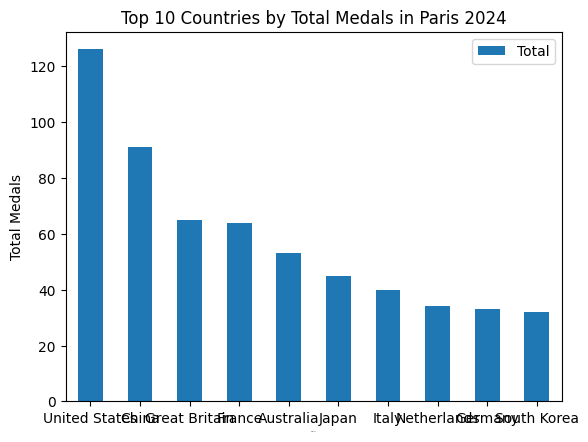

In [20]:
import matplotlib.pyplot as plt

top_10_countries = paris2024_df.sort_values(by='Total', ascending=False).head(10)
top_10_countries.plot.bar(x='Country', y='Total', rot=0 )

plt.title('Top 10 Countries by Total Medals in Paris 2024')
plt.xlabel('Country',size=0.3)
plt.ylabel('Total Medals')
plt.show()

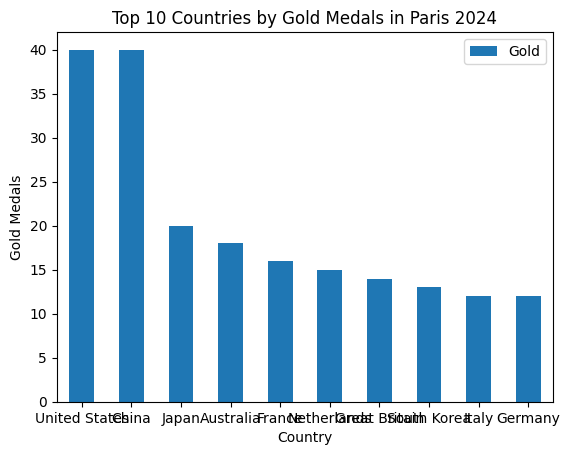

In [21]:
import matplotlib.pyplot as plt
top_10_countries = paris2024_df.sort_values(by='Gold', ascending=False).head(10)
top_10_countries.plot.bar(x='Country', y='Gold', rot=0)
plt.title('Top 10 Countries by Gold Medals in Paris 2024')
plt.xlabel('Country')
plt.ylabel('Gold Medals')
plt.show()

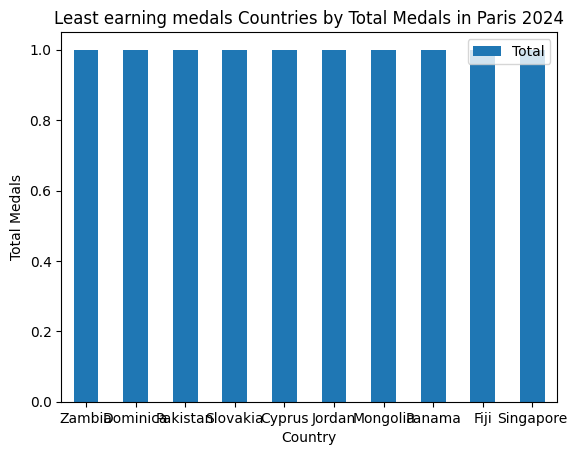

In [22]:
worst_5_countries = paris2024_df.sort_values(by='Total', ascending=True).head(10)
worst_5_countries.plot.bar(x='Country', y='Total',rot=0)
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.title('Least earning medals Countries by Total Medals in Paris 2024')
plt.show()

In [23]:
 rio2016_df["Country"].replace("United States of America","United States")

,Country
0,Algeria
1,Argentina
2,Armenia
3,Australia
4,Austria
...,...
81,United Arab Emirates
82,United States
83,Uzbekistan
84,Venezuela


  3.2/ Visualisaion Tokyo 2020

In [24]:
tokyo2020_df["Country"].replace("United States of America","United States")

,Country
0,Argentina
1,Armenia
2,Australia
3,Austria
4,Azerbaijan
...,...
88,Uganda
89,Ukraine
90,United States
91,Uzbekistan


* 3.3/ Visualisaion rio 2016


* 3.4/ Visualisaion totale des 3 JO


In [25]:
Total_Olympics_Table=pd.concat([paris2024_df,tokyo2020_df,rio2016_df])

In [26]:
# Ensure numeric columns are properly formatted
for df in [paris2024_df, tokyo2020_df, rio2016_df]:
    for col in ['Gold', 'Silver', 'Bronze', 'Total']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)



In [27]:
combined_data = pd.concat(
    [paris2024_df[['Country', 'Gold', 'Silver', 'Bronze', 'Total']],
     tokyo2020_df[['Country', 'Gold', 'Silver', 'Bronze', 'Total']],
     rio2016_df[['Country', 'Gold', 'Silver', 'Bronze', 'Total']]]
)



<Figure size 1200x800 with 0 Axes>

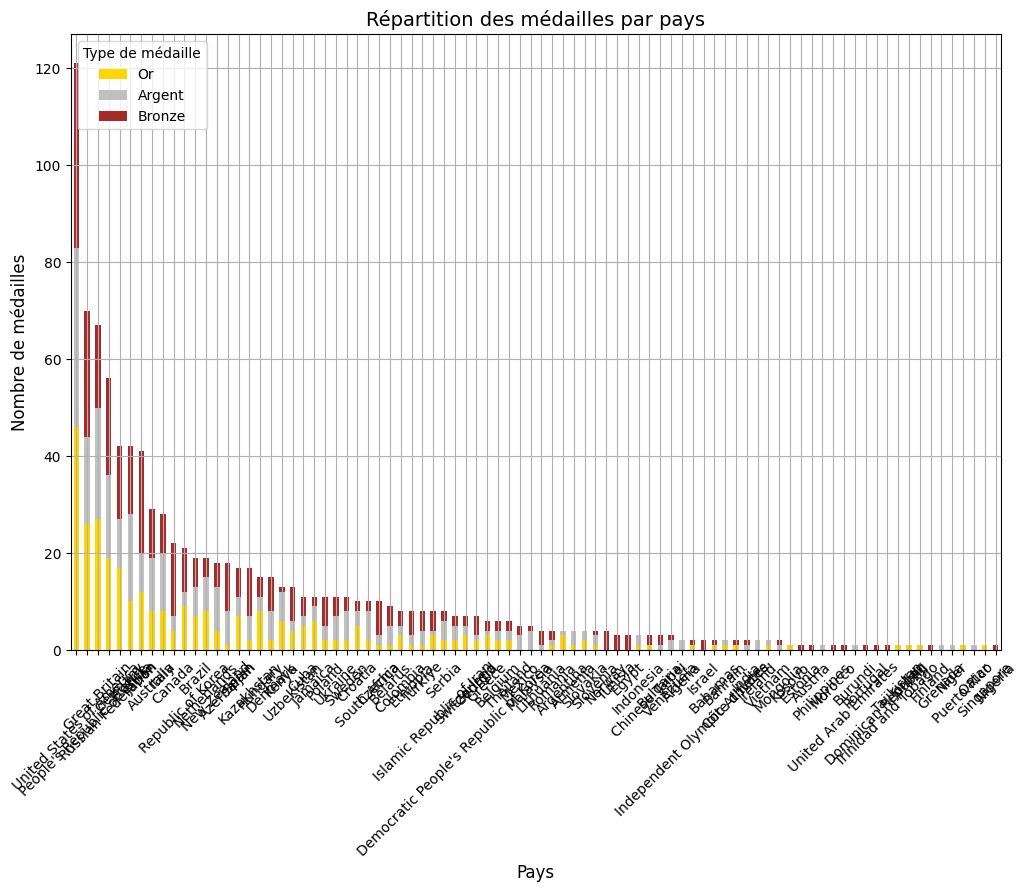

<ipython-input-28-a05d215313a0>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='Country', data=df_sorted, palette='viridis')


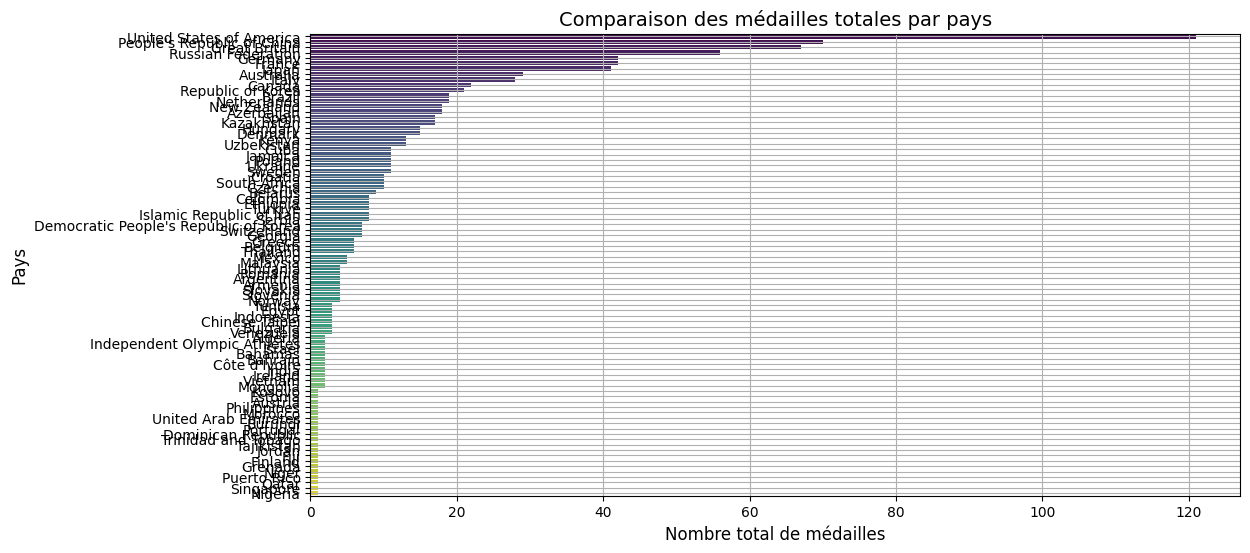

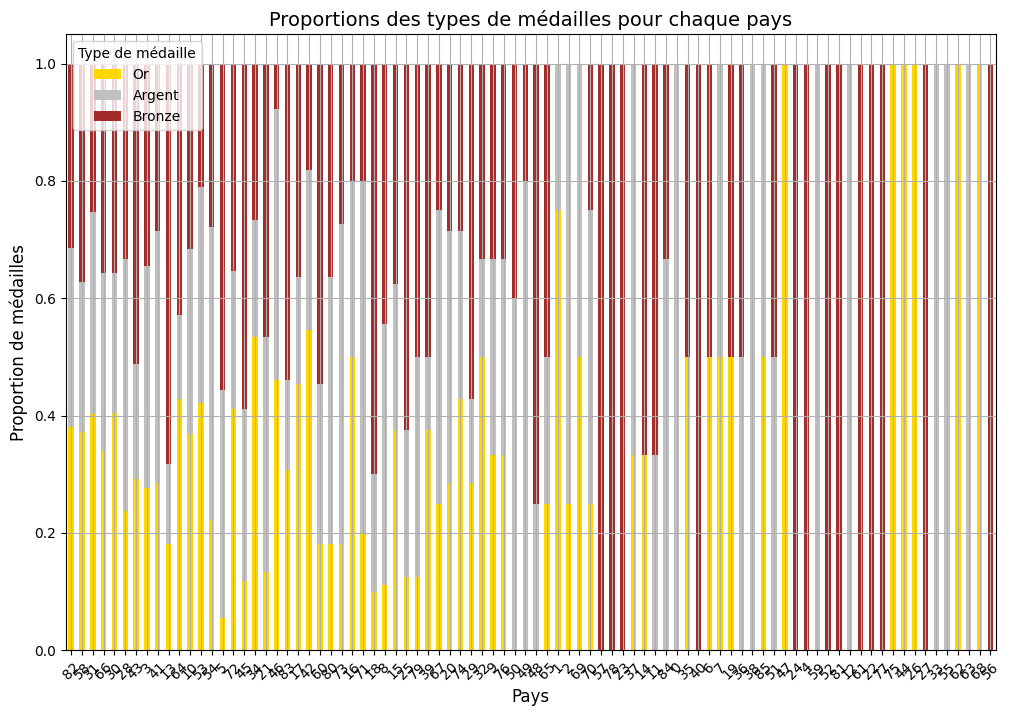

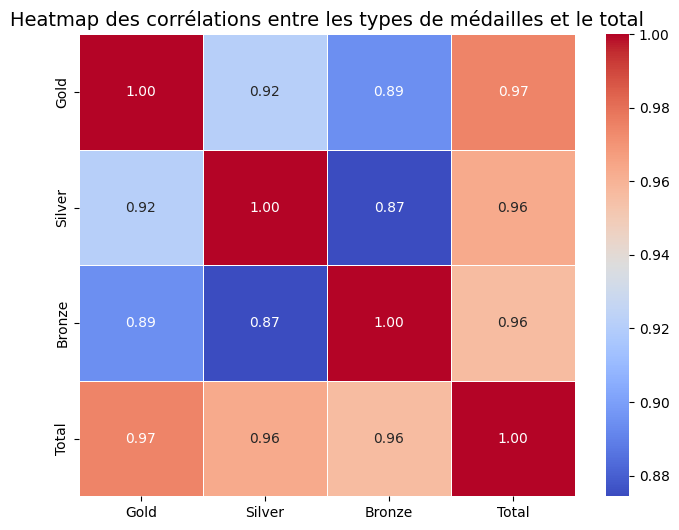

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Distribution des médailles par pays (barplot)
plt.figure(figsize=(12, 8))
df_sorted = df.sort_values(by='Total', ascending=False)

#   graphique en barres montrant les médailles d'Or, d'Argent et de Bronze
df_sorted.set_index('Country')[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, color=['gold', 'silver', 'brown'], figsize=(12,8))

plt.title('Répartition des médailles par pays', fontsize=14)
plt.xlabel('Pays', fontsize=12)
plt.ylabel('Nombre de médailles', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Type de médaille', loc='upper left', labels=['Or', 'Argent', 'Bronze'])
plt.grid(True)
plt.show()

# 2. Comparaison des médailles totales par pays
plt.figure(figsize=(12, 6))
sns.barplot(x='Total', y='Country', data=df_sorted, palette='viridis')

plt.title('Comparaison des médailles totales par pays', fontsize=14)
plt.xlabel('Nombre total de médailles', fontsize=12)
plt.ylabel('Pays', fontsize=12)
plt.grid(True)
plt.show()

# 3. Proportions de chaque type de médaille pour chaque pays (Graphique en barres empilées)
df_sorted['Total_Medals'] = df_sorted[['Gold', 'Silver', 'Bronze']].sum(axis=1)

# Normalisation des données pour avoir des proportions
df_normalized = df_sorted[['Gold', 'Silver', 'Bronze']].div(df_sorted['Total_Medals'], axis=0)

# Tracer le graphique en barres empilées
df_normalized.plot(kind='bar', stacked=True, figsize=(12, 8), color=['gold', 'silver', 'brown'])

plt.title('Proportions des types de médailles pour chaque pays', fontsize=14)
plt.xlabel('Pays', fontsize=12)
plt.ylabel('Proportion de médailles', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Type de médaille', loc='upper left', labels=['Or', 'Argent', 'Bronze'])
plt.grid(True)
plt.show()

# 4. Heatmap des corrélations entre les types de médailles et le total
corr = df[['Gold', 'Silver', 'Bronze', 'Total']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Heatmap des corrélations entre les types de médailles et le total', fontsize=14)
plt.show()


Explication des visualisations :
Répartition des médailles par pays  :

Ce graphique montre la répartition des médailles d'Or, d'Argent et de Bronze pour chaque pays. Chaque barre représente un pays, et la taille de chaque section de la barre représente le nombre de médailles dans chaque catégorie .
Comparaison des médailles totales par pays (Graphique en barres) :

Ce graphique montre le nombre total de médailles obtenues par chaque pays. Il est trié par le nombre total de médailles, ce qui permet de visualiser rapidement quels pays ont obtenu le plus de médailles.
Proportions des types de médailles pour chaque pays (Graphique en barres empilées normalisées) :

Ce graphique montre la proportion de chaque type de médaille pour chaque pays (en pourcentage). Cela permet de comprendre la domination d'un type de médaille dans les résultats d'un pays.
Heatmap des corrélations :

La heatmap montre les corrélations entre les colonnes Gold, Silver, Bronze, et Total. Cela peut donner une idée de la relation entre le nombre de médailles dans chaque catégorie et le total de médailles.

<ipython-input-29-eab0a69034c8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='Country', data=top_5, palette='viridis')


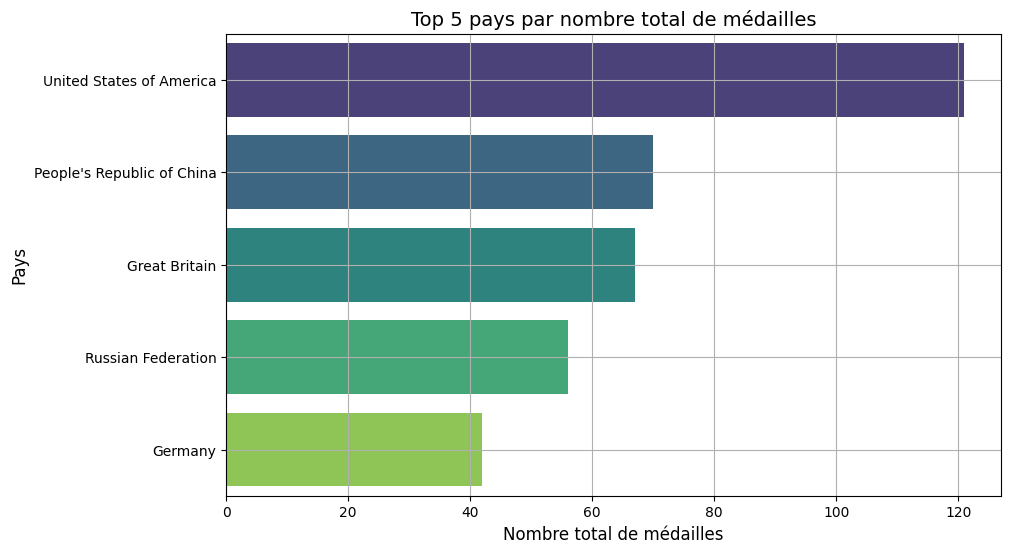

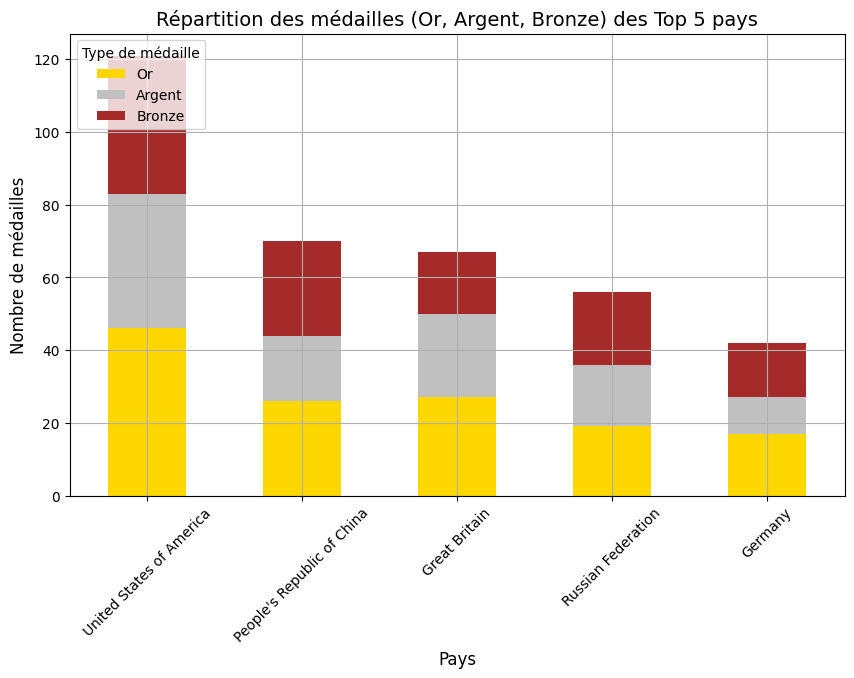

In [29]:
# Tri du dataset pour obtenir les top 5 pays avec le plus de médailles totales
top_5 = df.sort_values(by='Total', ascending=False).head(5)

# 1. Graphique des médailles totales des Top 5 pays
plt.figure(figsize=(10, 6))
sns.barplot(x='Total', y='Country', data=top_5, palette='viridis')

plt.title('Top 5 pays par nombre total de médailles', fontsize=14)
plt.xlabel('Nombre total de médailles', fontsize=12)
plt.ylabel('Pays', fontsize=12)
plt.grid(True)
plt.show()

# 2. Répartition des médailles par pays pour les Top 5 (Or, Argent, Bronze)
top_5.set_index('Country')[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['gold', 'silver', 'brown'])

plt.title('Répartition des médailles (Or, Argent, Bronze) des Top 5 pays', fontsize=14)
plt.xlabel('Pays', fontsize=12)
plt.ylabel('Nombre de médailles', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Type de médaille', loc='upper left', labels=['Or', 'Argent', 'Bronze'])
plt.grid(True)
plt.show()


Explication des graphiques :
Graphique des médailles totales des Top 5 pays :
Ce graphique affiche les 5 pays ayant remporté le plus grand nombre de médailles totales. Il est trié par le nombre de médailles, vous permettant de comparer rapidement les performances des principaux pays.
Répartition des médailles (Or, Argent, Bronze) des Top 5 pays :
Ce graphique empilé montre comment les médailles d'Or, d'Argent et de Bronze sont réparties entre les top 5 pays. Chaque barre représente un pays et est divisée en sections représentant les types de médailles obtenues.

In [30]:
total_olympics_table = combined_data.groupby('Country', as_index=False).sum()

# Display the Total_Olympics_Table
total_olympics_table.head()



,Country,Gold,Silver,Bronze,Total
0,Albania,0,0,2,2
1,Algeria,2,2,1,5
2,Argentina,4,3,3,10
3,Armenia,1,8,3,12
4,Australia,43,37,48,128


In [31]:
total_olympics_table["Rank"]="None"

In [32]:
total_olympics_table

,Country,Gold,Silver,Bronze,Total,Rank
0,Albania,0,0,2,2,None
1,Algeria,2,2,1,5,None
2,Argentina,4,3,3,10,None
3,Armenia,1,8,3,12,None
4,Australia,43,37,48,128,None
...,...,...,...,...,...,...
121,United States of America,85,78,71,234,None
122,Uzbekistan,15,4,12,31,None
123,Venezuela,1,5,1,7,None
124,Vietnam,1,1,0,2,None


In [33]:
total_olympics_table.sort_values(by='Total', ascending=False, inplace=True)
total_olympics_table.reset_index(drop=True, inplace=True)
total_olympics_table.index = total_olympics_table.index + 1
total_olympics_table


,Country,Gold,Silver,Bronze,Total,Rank
1,United States of America,85,78,71,234,None
2,Great Britain,63,65,68,196,None
3,People's Republic of China,64,50,45,159,None
4,Japan,59,34,51,144,None
5,France,36,56,47,139,None
...,...,...,...,...,...,...
122,Pakistan,1,0,0,1,None
123,Panama,0,1,0,1,None
124,Peru,0,0,1,1,None
125,Refugee Olympic Team,0,0,1,1,None


In [34]:
total_olympics_table["Rank"]=total_olympics_table.index
total_olympics_table


,Country,Gold,Silver,Bronze,Total,Rank
1,United States of America,85,78,71,234,1
2,Great Britain,63,65,68,196,2
3,People's Republic of China,64,50,45,159,3
4,Japan,59,34,51,144,4
5,France,36,56,47,139,5
...,...,...,...,...,...,...
122,Pakistan,1,0,0,1,122
123,Panama,0,1,0,1,123
124,Peru,0,0,1,1,124
125,Refugee Olympic Team,0,0,1,1,125


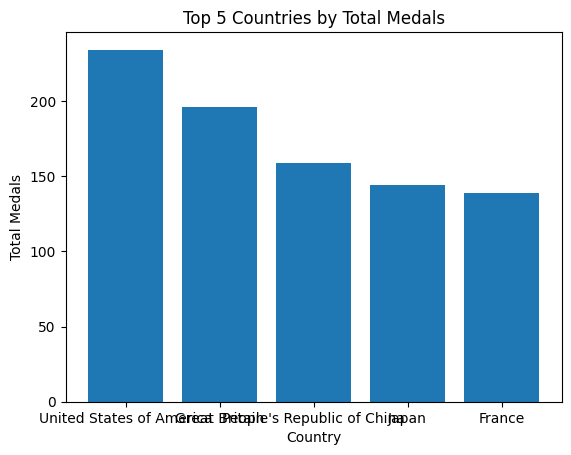

In [35]:
Top_5_medal_earning_countries=total_olympics_table.head(5)
plt.bar(Top_5_medal_earning_countries['Country'],Top_5_medal_earning_countries['Total'])
plt.xlabel('Country',size=10)
plt.ylabel('Total Medals')
plt.title('Top 5 Countries by Total Medals')
plt.show()

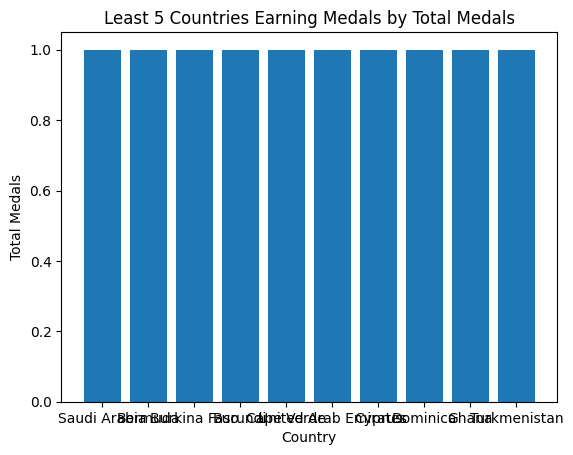

In [36]:
least_5_medal_earning_countries = total_olympics_table.nsmallest(10, 'Total')
plt.bar(least_5_medal_earning_countries['Country'], least_5_medal_earning_countries['Total'])
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.title('Least 5 Countries Earning Medals by Total Medals')
plt.show()



```
4/ Machine learning



In [37]:
import pandas as pd
Paris_statistiques=paris2024_df[['Country','Total']].rename(columns={'Total':"Paris 2024"})
Paris_statistiques

,Country,Paris 2024
0,United States,126
1,China,91
2,Japan,45
3,Australia,53
4,France,64
...,...,...
86,Peru,1
87,Qatar,1
88,Singapore,1
89,Slovakia,1


In [38]:
Tokyo_statistiques=tokyo2020_df[['Country','Total']].rename(columns={'Total':"Tokyo 2020"})
Rio_statistiques=rio2016_df[['Country','Total']].rename(columns={'Total':"Rio 2016"})


In [39]:
resultats = (
    Paris_statistiques
    .merge(Tokyo_statistiques, on='Country', how='outer')
    .merge(Rio_statistiques, on='Country', how='outer')
)
resultats

,Country,Paris 2024,Tokyo 2020,Rio 2016
0,Albania,2.0,NaN,NaN
1,Algeria,3.0,NaN,2.0
2,Argentina,3.0,3.0,4.0
3,Armenia,4.0,4.0,4.0
4,Australia,53.0,46.0,29.0
...,...,...,...,...
121,United States of America,NaN,113.0,121.0
122,Uzbekistan,13.0,5.0,13.0
123,Venezuela,NaN,4.0,3.0
124,Vietnam,NaN,NaN,2.0


In [40]:
resultats.notnull().sum().sum()

396

In [41]:
resultats.isnull().sum()

,0
Country,0
Paris 2024,35
Tokyo 2020,33
Rio 2016,40


In [42]:
resultats.fillna(0,inplace=True)
resultats.isnull().sum()

,0
Country,0
Paris 2024,0
Tokyo 2020,0
Rio 2016,0


In [43]:
resultats.head()

,Country,Paris 2024,Tokyo 2020,Rio 2016
0,Albania,2.0,0.0,0.0
1,Algeria,3.0,0.0,2.0
2,Argentina,3.0,3.0,4.0
3,Armenia,4.0,4.0,4.0
4,Australia,53.0,46.0,29.0


In [44]:
resultats = resultats.drop(columns=['USA 2028'], errors='ignore')  # Drop the column if it exists


In [45]:
resultats['USA 2028'] = 0
resultats

,Country,Paris 2024,Tokyo 2020,Rio 2016,USA 2028
0,Albania,2.0,0.0,0.0,0
1,Algeria,3.0,0.0,2.0,0
2,Argentina,3.0,3.0,4.0,0
3,Armenia,4.0,4.0,4.0,0
4,Australia,53.0,46.0,29.0,0
...,...,...,...,...,...
121,United States of America,0.0,113.0,121.0,0
122,Uzbekistan,13.0,5.0,13.0,0
123,Venezuela,0.0,4.0,3.0,0
124,Vietnam,0.0,0.0,2.0,0


FEATURE ENGINEERING
Create temporal and weighted features from your dataset:
Trend Deltas (Year-over-Year Changes):

Calculate medal count differences between consecutive years.

In [46]:
resultats['Delta_2020_2016'] = resultats['Tokyo 2020'] - resultats['Rio 2016']
resultats['Delta_2024_2020'] = resultats['Paris 2024'] - resultats['Tokyo 2020']


Assign higher weight to recent Olympics (e.g., Paris 2024) to capture its importance.


In [47]:
resultats['Weighted_Medals'] = 0.5 * resultats['Rio 2016'] + 0.8 * resultats['Tokyo 2020'] + 1.0 * resultats['Paris 2024']


In [48]:
resultats['Cumulative_Medals'] = resultats[['Rio 2016', 'Tokyo 2020', 'Paris 2024']].sum(axis=1)


In [49]:
resultats

,Country,Paris 2024,Tokyo 2020,Rio 2016,USA 2028,Delta_2020_2016,Delta_2024_2020,Weighted_Medals,Cumulative_Medals
0,Albania,2.0,0.0,0.0,0,0.0,2.0,2.0,2.0
1,Algeria,3.0,0.0,2.0,0,-2.0,3.0,4.0,5.0
2,Argentina,3.0,3.0,4.0,0,-1.0,0.0,7.4,10.0
3,Armenia,4.0,4.0,4.0,0,0.0,0.0,9.2,12.0
4,Australia,53.0,46.0,29.0,0,17.0,7.0,104.3,128.0
...,...,...,...,...,...,...,...,...,...
121,United States of America,0.0,113.0,121.0,0,-8.0,-113.0,150.9,234.0
122,Uzbekistan,13.0,5.0,13.0,0,-8.0,8.0,23.5,31.0
123,Venezuela,0.0,4.0,3.0,0,1.0,-4.0,4.7,7.0
124,Vietnam,0.0,0.0,2.0,0,-2.0,0.0,1.0,2.0


In [50]:
resultats['Growth_2020_2016'] = (resultats['Tokyo 2020'] - resultats['Rio 2016']) / resultats['Rio 2016'].replace(0, 1)
resultats['Growth_2024_2020'] = (resultats['Paris 2024'] - resultats['Tokyo 2020']) / resultats['Tokyo 2020'].replace(0, 1)


Step 2: Prepare Data for Modeling


1. Vérification des Données
Avant de passer à la modélisation :



In [51]:
# Préparation des données
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = resultats[['Rio 2016', 'Tokyo 2020', 'Paris 2024', 'Delta_2020_2016', 'Delta_2024_2020', 'Cumulative_Medals']]
y = resultats['Paris 2024']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Évaluation du modèle
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Prédiction pour les USA en 2028
# Prédictions pour tous les pays
X_all_countries = resultats[['Rio 2016', 'Tokyo 2020', 'Paris 2024', 'Delta_2020_2016', 'Delta_2024_2020', 'Cumulative_Medals']]
predictions_all_countries = model.predict(X_all_countries)
resultats['Predictions 2028'] = predictions_all_countries  # Nouvelle colonne pour les prédictions
print(resultats[['Country', 'Predictions 2028']])

Mean Squared Error: 0.8413000000000006
R² Score: 0.9939078027251692
                      Country  Predictions 2028
0                     Albania              2.00
1                     Algeria              2.97
2                   Argentina              2.99
3                     Armenia              4.01
4                   Australia             51.06
..                        ...               ...
121  United States of America              2.21
122                Uzbekistan             12.34
123                 Venezuela              0.00
124                   Vietnam              0.00
125                    Zambia              1.00

[126 rows x 2 columns]


In [52]:
print(y_train.value_counts())


Paris 2024
0.0      26
1.0      13
4.0       8
3.0       8
2.0       6
6.0       6
7.0       6
5.0       4
9.0       3
8.0       3
11.0      2
91.0      1
10.0      1
18.0      1
12.0      1
34.0      1
40.0      1
20.0      1
33.0      1
13.0      1
27.0      1
65.0      1
19.0      1
64.0      1
126.0     1
45.0      1
Name: count, dtype: int64


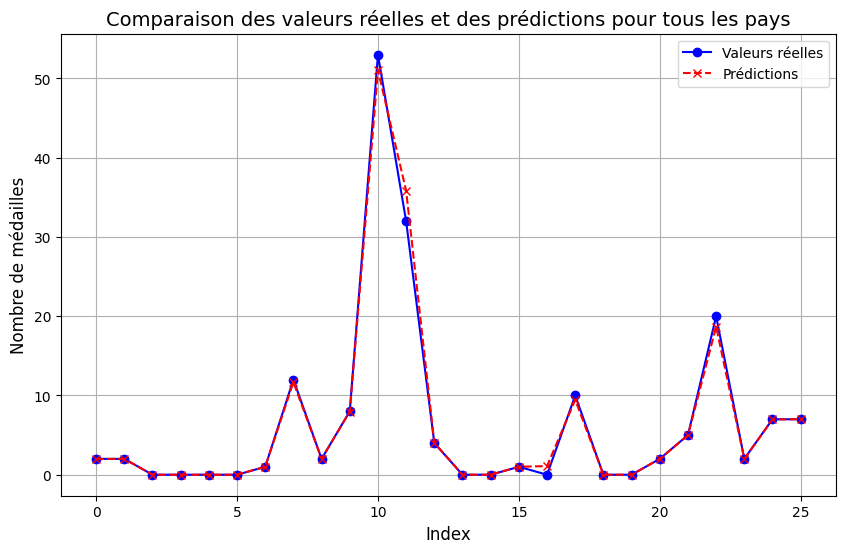

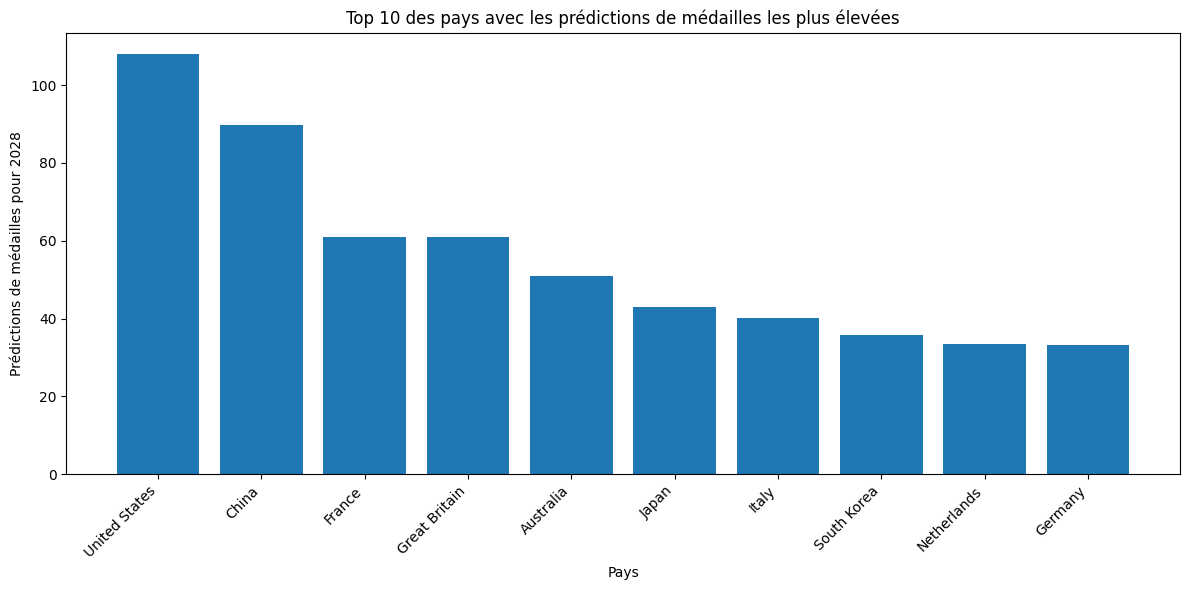

<ipython-input-56-481a45d6f779>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


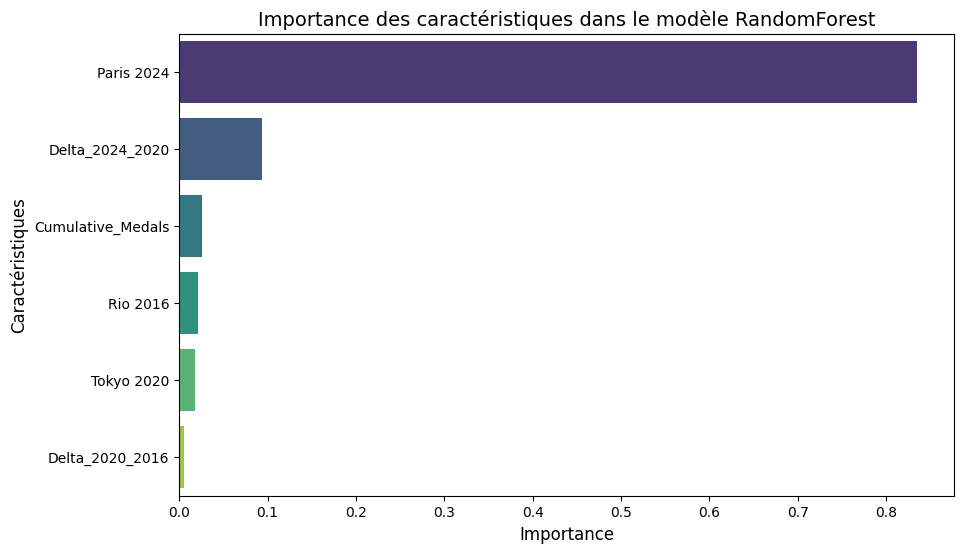

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Visualiser les prédictions par rapport aux valeurs réelles pour tous les pays
plt.figure(figsize=(10, 6))

# Tracer les vraies valeurs et les valeurs prédites
plt.plot(y_test.values, label='Valeurs réelles', marker='o', linestyle='-', color='b')
plt.plot(y_pred, label='Prédictions', marker='x', linestyle='--', color='r')

plt.title('Comparaison des valeurs réelles et des prédictions pour tous les pays', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Nombre de médailles', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


# 2. Visualiser les prédictions pour tous les pays en 2028 (USA 2028)
# Trier les pays par prédictions
top_countries = resultats.sort_values(by='Predictions 2028', ascending=False).head(10) #Utiliser 'Predictions 2028'

# Créer un diagramme à barres
plt.figure(figsize=(12, 6))
plt.bar(top_countries['Country'], top_countries['Predictions 2028']) #Utiliser 'Predictions 2028'
plt.xlabel('Pays')
plt.ylabel('Prédictions de médailles pour 2028')
plt.title('Top 10 des pays avec les prédictions de médailles les plus élevées')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Visualiser l'importance des caractéristiques dans le modèle RandomForest
plt.figure(figsize=(10, 6))

# Récupérer l'importance des caractéristiques
importances = model.feature_importances_

# Créer un DataFrame pour l'importance des caractéristiques
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Trier les caractéristiques par importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Tracer l'importance des caractéristiques
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Importance des caractéristiques dans le modèle RandomForest', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Caractéristiques', fontsize=12)
plt.show()

Comparaison des valeurs réelles et des prédictions : Le graphique montre les valeurs réelles (y_test) et les valeurs prédites (y_pred) pour tous les pays de l'ensemble de test. Cela permet de visualiser la performance globale du modèle et de voir s'il suit bien les tendances des données réelles pour l'ensemble des pays.

Prédictions pour tous les pays en 2028 : Le graphique à barres affiche les prédictions du nombre de médailles pour tous les pays en 2028, triés par ordre décroissant. (identifier les pays qui sont prévus pour remporter le plus grand nombre de médailles aux Jeux Olympiques de 2028)

Résultats attendus :
* Le premier graphique compare les valeurs réelles et les prédictions du modèle pour les Jeux Olympiques de 2024 pour tous les pays de l'ensemble de test.
* Le deuxième graphique montre les prédictions du nombre de médailles pour tous les pays en 2028, triés par ordre décroissant.
* Le troisième graphique met en évidence quelles sont les caractéristiques les plus importantes pour la prédiction du nombre de médailles



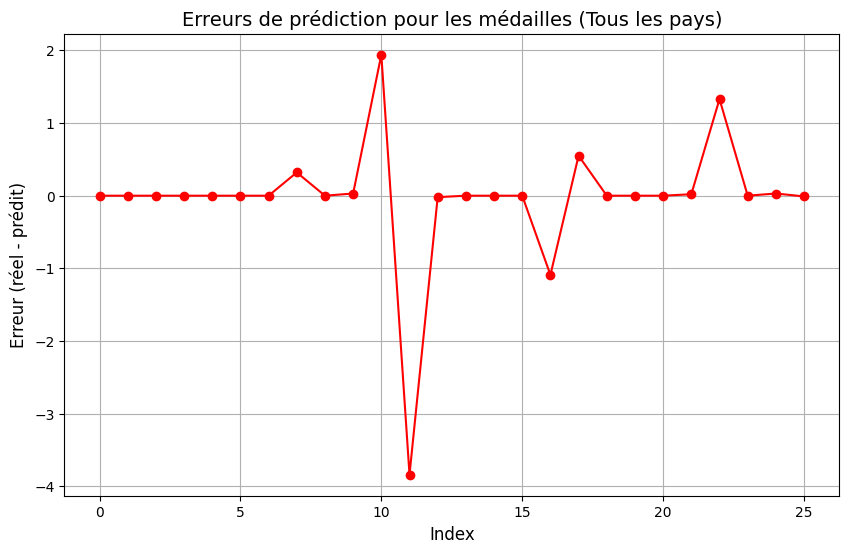

In [57]:
# 1. Calcul des erreurs (différence entre les vraies valeurs et les valeurs prédites)
errors = y_test.values - y_pred

# 2. Afficher les erreurs de prédiction
plt.figure(figsize=(10, 6))
plt.plot(errors, marker='o', linestyle='-', color='r')

# Ajouter des titres et labels
plt.title('Erreurs de prédiction pour les médailles (Tous les pays)', fontsize=14)  # Changement ici
plt.xlabel('Index', fontsize=12)
plt.ylabel('Erreur (réel - prédit)', fontsize=12)
plt.grid(True)
plt.show()

Explication :
Nous calculons la différence entre les vraies valeurs (y_test.values) et les valeurs prédites (y_pred) pour chaque point.
Ensuite, nous traçons ces erreurs. Une grande erreur (éloignée de zéro) indique une mauvaise prédiction, et une petite erreur (près de zéro) indique une bonne prédiction
Analyse :
Erreur moyenne proche de zéro :
Les points oscillent autour de zéro, ce qui indique que le modèle ne présente pas de biais systématique important (il ne sur- ou sous-estime pas systématiquement les valeurs).

Erreurs modérées sauf quelques cas :

La majorité des erreurs se situent entre -1 et 2, ce qui montre une bonne précision globale.
Cependant, il y a quelques erreurs plus importantes, notamment à l'indice 10 (erreur de -4) et un pic à l'indice 16 (erreur de 2).
Stabilité globale :
Hormis les pics mentionnés, les erreurs restent relativement constantes, ce qui peut indiquer que le modèle est stable pour la plupart des données.

Step 3 : Choose a ML model and train it

Random Forest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Predict the medal count for USA 2028:

In [59]:
y_pred = model.predict(X_test)


Evaluate the Model

In [60]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, R²: {r2}")

MAE: 0.3530769230769231, R²: 0.9939078027251692


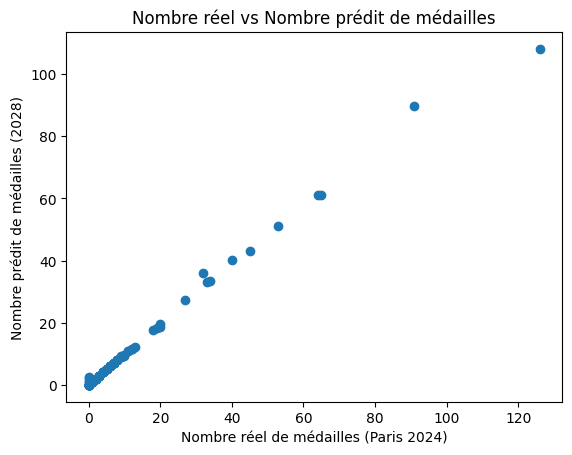

In [62]:
import matplotlib.pyplot as plt

# Utiliser les données de tous les pays et les prédictions
plt.scatter(resultats['Paris 2024'], resultats['Predictions 2028'])

plt.xlabel('Nombre réel de médailles (Paris 2024)')
plt.ylabel('Nombre prédit de médailles (2028)')
plt.title('Nombre réel vs Nombre prédit de médailles')
plt.show()

In [63]:
print("Training Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)

# Check overlap between training and testing data
overlap = set(X_train.index).intersection(set(X_test.index))
print("Overlap in indices between train and test:", len(overlap))


Training Data Shape: (100, 6) (100,)
Testing Data Shape: (26, 6) (26,)
Overlap in indices between train and test: 0


In [68]:
import pickle
with open('mon_modele.pkl', 'wb') as f:
  pickle.dump(model, f)

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
